In [1]:
%pylab inline
import sys,os
import rdkit
import networkx as nx
import pandas as pd


Populating the interactive namespace from numpy and matplotlib


In [62]:
x1=np.exp(np.arange(-10,0.1,0.1))
x2=-x1
x1=x1[np.abs(x1)>0.005]
x2=x2[np.abs(x2)>0.005]

In [63]:
def f1(x):
    return np.log(np.abs(x))
def f2(x):
    return 0.5* np.log(x*x)

In [64]:
np.max(np.abs(f1(x1)-f2(x1)))

2.220446049250313e-16

In [65]:
def ff(x):
    return 1/x
def fff(x):
    return -1/x/x

(-0.1, 0.1)

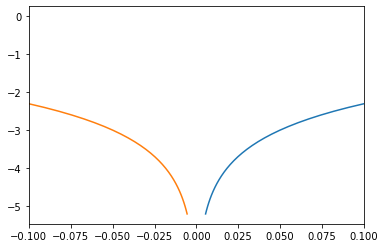

In [71]:
plot(x1,f2(x1), x2,f2(x2))
plt.xlim(-1e-1,1e-1)

(-0.1, 0.1)

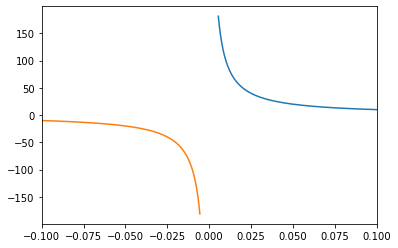

In [67]:
plot(x1,ff(x1), x2,ff(x2))
plt.xlim(-1e-1,1e-1)

(-0.1, 0.1)

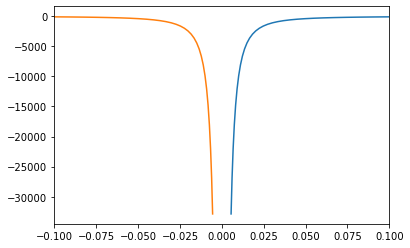

In [68]:
plot(x1,fff(x1), x2,fff(x2))
plt.xlim(-1e-1,1e-1)

In [69]:
np.exp([-1,-2,-3,-4,-5]), np.log(0.005)

(array([0.36787944, 0.13533528, 0.04978707, 0.01831564, 0.00673795]),
 -5.298317366548036)

In [73]:
def T(x,a):
    return f2(a)+1/x*(x-a)-1/(2*x*x)*(x-a)**2

In [77]:
T(2,1.9),f2(2)

(0.6906038861723949, 0.6931471805599453)

In [78]:
x1

array([0.00551656, 0.00609675, 0.00673795, 0.00744658, 0.00822975,
       0.00909528, 0.01005184, 0.011109  , 0.01227734, 0.01356856,
       0.01499558, 0.01657268, 0.01831564, 0.02024191, 0.02237077,
       0.02472353, 0.02732372, 0.03019738, 0.03337327, 0.03688317,
       0.0407622 , 0.0450492 , 0.04978707, 0.05502322, 0.06081006,
       0.06720551, 0.07427358, 0.082085  , 0.09071795, 0.10025884,
       0.11080316, 0.12245643, 0.13533528, 0.14956862, 0.16529889,
       0.18268352, 0.20189652, 0.22313016, 0.24659696, 0.27253179,
       0.30119421, 0.33287108, 0.36787944, 0.40656966, 0.44932896,
       0.4965853 , 0.54881164, 0.60653066, 0.67032005, 0.74081822,
       0.81873075, 0.90483742, 1.        ])

In [105]:
def g(a):
    aa=np.arange(a*.9,a*1.1,0.2*a/10)
    return aa,T(aa,a)
def g2(a):
    aa=np.arange(a-0.1,a+0.1,1/100)
    return aa,T(aa,a)

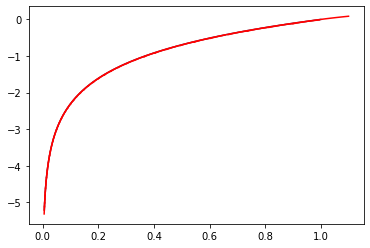

In [97]:
plot(x1,f1(x1))
lst=[]
for u in x1:
    ax,ay=g(u)
    err = np.abs(ay-f1(ax))
    lst.append(np.max(err))
    plot(ax,ay,c='r')

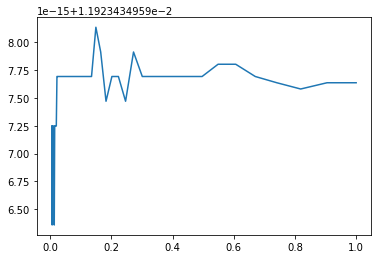

In [91]:
plt.plot(x1,lst)

In [96]:
np.log(np.max(lst))

-4.429249491117505

In [94]:
np.min(lst), np.max(lst)

(0.011923434959456358, 0.011923434959458135)

In [142]:
def sorted_eig(A):
    eigenValues, eigenVectors = np.linalg.eig(A)

    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues,eigenVectors

In [192]:
N = 100
b = np.random.random_integers(-2000,2000,size=(N,N))

/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(-2000, 2000 + 1) instead
  


In [193]:
B=np.corrcoef(b)

In [194]:
B

array([[ 1.        , -0.03869725,  0.20811999, ...,  0.01525869,
         0.08937709, -0.05793575],
       [-0.03869725,  1.        ,  0.00681392, ...,  0.09218886,
         0.19936929,  0.07953801],
       [ 0.20811999,  0.00681392,  1.        , ..., -0.10031228,
        -0.01641948,  0.15950091],
       ...,
       [ 0.01525869,  0.09218886, -0.10031228, ...,  1.        ,
         0.11879213, -0.0484846 ],
       [ 0.08937709,  0.19936929, -0.01641948, ...,  0.11879213,
         1.        , -0.11788338],
       [-0.05793575,  0.07953801,  0.15950091, ..., -0.0484846 ,
        -0.11788338,  1.        ]])

In [195]:
w, v = sorted_eig(B)

In [196]:
ww=np.diag(w)

In [197]:
w.shape,v.shape

((100,), (100, 100))

In [198]:
np.matmul(np.matmul(v,ww),v.T)

array([[ 1.        , -0.03869725,  0.20811999, ...,  0.01525869,
         0.08937709, -0.05793575],
       [-0.03869725,  1.        ,  0.00681392, ...,  0.09218886,
         0.19936929,  0.07953801],
       [ 0.20811999,  0.00681392,  1.        , ..., -0.10031228,
        -0.01641948,  0.15950091],
       ...,
       [ 0.01525869,  0.09218886, -0.10031228, ...,  1.        ,
         0.11879213, -0.0484846 ],
       [ 0.08937709,  0.19936929, -0.01641948, ...,  0.11879213,
         1.        , -0.11788338],
       [-0.05793575,  0.07953801,  0.15950091, ..., -0.0484846 ,
        -0.11788338,  1.        ]])

In [199]:
bb = np.random.permutation(b)

In [200]:
BB=np.corrcoef(bb)

In [201]:
BB.sum(),B.sum()

(91.24736353812406, 91.24736353812406)

In [202]:
w2, v2 = sorted_eig(BB)

In [207]:
(w2-w).sum()

1.293951486131213e-15

In [208]:
(v-v2)

array([[-0.22202026, -0.07129279,  0.13652837, ..., -0.10026897,
         0.2383125 ,  0.19209771],
       [-0.03598193, -0.17597914, -0.24991774, ...,  0.20798278,
         0.12721108,  0.19896264],
       [-0.30463806, -0.07965009,  0.19038787, ...,  0.09150039,
        -0.20197244, -0.19890088],
       ...,
       [ 0.08783766,  0.07835419,  0.07764451, ..., -0.14468045,
        -0.10092362,  0.11019563],
       [-0.24046842, -0.08241081,  0.11410717, ..., -0.0769044 ,
         0.05956691,  0.02857193],
       [ 0.09169005,  0.20425447,  0.20093105, ...,  0.074131  ,
        -0.27732834,  0.13301127]])

In [125]:
from sklearn.datasets import load_diabetes
boston = load_diabetes()
(boston.data.shape)

(442, 10)

In [126]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['target']=boston.target
df=df.sample(frac=1)
df.head()

age       sex       bmi        bp        s1        s2        s3  \
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
275 -0.005515  0.050680 -0.011595  0.011544 -0.022208 -0.015406 -0.021311   
137  0.005383 -0.044642  0.049840  0.097616 -0.015328 -0.016345 -0.006584   
422 -0.078165  0.050680  0.077863  0.052858  0.078236  0.064447  0.026550   
339  0.027178 -0.044642 -0.007284 -0.050428  0.075484  0.056619  0.033914   

           s4        s5        s6  target  
10  -0.076395 -0.062913 -0.034215   101.0  
275 -0.002592  0.011008  0.069338    94.0  
137 -0.002592  0.017037 -0.013504   280.0  
422 -0.002592  0.040672 -0.009362   233.0  
339 -0.002592  0.043443  0.015491    95.0

In [127]:
df.iloc[:300].to_csv("/tmp/diabetes.train.csv",  index=None)
df.iloc[300:].to_csv("/tmp/diabetes.test.csv",  index=None)

In [211]:
from sklearn.datasets import load_boston
boston = load_boston()
(boston.data.shape)

(506, 13)

In [223]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['target']=boston.target
df=df.sample(frac=1)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   
196  0.04011  80.0   1.52   0.0  0.404  7.287  34.1  7.3090  2.0  329.0   
182  0.09103   0.0   2.46   0.0  0.488  7.155  92.2  2.7006  3.0  193.0   
44   0.12269   0.0   6.91   0.0  0.448  6.069  40.0  5.7209  3.0  233.0   
198  0.03768  80.0   1.52   0.0  0.404  7.274  38.3  7.3090  2.0  329.0   

     PTRATIO       B  LSTAT  target  
5       18.7  394.12   5.21    28.7  
196     12.6  396.90   4.08    33.3  
182     17.8  394.12   4.82    37.9  
44      17.9  389.39   9.55    21.2  
198     12.6  392.20   6.62    34.6

In [224]:
df.iloc[:400].to_csv("/tmp/boston.train.csv",  index=None)
df.iloc[400:].to_csv("/tmp/boston.test.csv",  index=None)

In [225]:
import fastparquet

In [226]:
fastparquet.write("/tmp/boston.train.parq", df.iloc[:400], compression='SNAPPY')
fastparquet.write("/tmp/boston.test.parq", df.iloc[400:], compression='SNAPPY')

In [249]:
traindf['target'].mean()

22.585500000000003

In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np

/home/bo/miniconda2/envs/deepchem/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
traindf=pd.read_csv("../../java/gbt/data/boston.train.csv")
testdf=pd.read_csv("../../java/gbt/data/boston.test.csv")

In [7]:
regressor = DecisionTreeRegressor(random_state=0,min_samples_leaf=5, min_samples_split=2)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
np.sqrt(mean_squared_error(regressor.predict(traindf.drop('target', 1).values), traindf['target'].values)), \
np.sqrt(mean_squared_error(regressor.predict(testdf.drop('target', 1).values), testdf['target'].values))


(2.4322903484752216, 3.2350656853319926)

In [16]:
regressor = RandomForestRegressor(random_state=0,min_samples_leaf=5, min_samples_split=2, n_estimators=1)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
np.sqrt(mean_squared_error(regressor.predict(traindf.drop('target', 1).values), traindf['target'].values)), \
np.sqrt(mean_squared_error(regressor.predict(testdf.drop('target', 1).values), testdf['target'].values))


(3.924450571000064, 3.71505061001502)

In [5]:

regressor =xgb.XGBRegressor(max_depth=20,n_estimators=1, learning_rate=1, min_child_weight=5,reg_lambda=0)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
np.sqrt(mean_squared_error(regressor.predict(traindf.drop('target', 1).values), traindf['target'].values)), \
np.sqrt(mean_squared_error(regressor.predict(testdf.drop('target', 1).values), testdf['target'].values))


(2.43229034847531, 3.2350657559598326)

In [6]:

regressor =lgb.LGBMRegressor(max_depth=20,n_estimators=1, learning_rate=1, min_child_samples=5,num_leaves=40000)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
np.sqrt(mean_squared_error(regressor.predict(traindf.drop('target', 1).values), traindf['target'].values)), \
np.sqrt(mean_squared_error(regressor.predict(testdf.drop('target', 1).values), testdf['target'].values))


(2.4889902531265236, 3.3955689972231315)

In [5]:
def log_abs_error(ytrue,ypred):
    
    a=np.abs(ytrue-ypred).astype(np.float64)
    a[a<1e-9]=1e-9
    return np.mean(np.log(a))
log_abs_error(np.arange(10),np.arange(10))

-20.72326583694641

In [6]:
def xgb_log_abs_error(ypred, dtrain):
    ytrue = dtrain.get_label()
    # return a pair metric_name, result. The metric name must not contain a colon (:) or a space
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'logabserror', float(log_abs_error(ytrue,ypred));

def lgb_log_abs_error(ypred, dtrain):
    ytrue = dtrain
    # return a pair metric_name, result. The metric name must not contain a colon (:) or a space
    # since preds are margin(before logistic transformation, cutoff at 0)
    return 'logabserror', float(log_abs_error(ytrue,ypred)), False;

In [109]:
from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import gc

def generate_dataset(n_train, n_test, n_features, noise=0.1, verbose=False):
    """Generate a regression dataset with the given parameters."""
    if verbose:
        print("generating dataset...")

    X, y, coef = make_regression(n_samples=n_train + n_test,
                                 n_features=n_features, noise=noise, coef=True)

    random_seed = 13
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
    X_train, y_train = shuffle(X_train, y_train, random_state=random_seed)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    if verbose:
        print("ok")
    return X_train, y_train, X_test, y_test


In [111]:
X_train, y_train, X_test, y_test = generate_dataset(1000,1000,20)
traindf=pd.DataFrame(X_train)
traindf['target']=y_train
testdf=pd.DataFrame(X_test)
testdf['target']=y_test

In [112]:
regressor = RandomForestRegressor(criterion='mse', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((2.7304472088636756e-05, 2.9264174221798644e-06, -20.555032759068727),
 (0.6895656427740262, 0.5436883940631833, -1.0160483536995306),
 (2.7304472088636756e-05, 2.9264174203406205e-06, -20.55503275906873),
 (0.703012395024007, 0.5564576793448494, -1.0043988027727346))

In [119]:
regressor = RandomForestRegressor(criterion='mae', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.18123024539043522, 0.1433183856846154, -2.355875203864897),
 (0.5072290085816231, 0.3936051435337774, -1.3691658357907672),
 (0.0, 0.0, -20.723265836946418),
 (0.5169556009496357, 0.401454485434067, -1.3494861372630627))

In [113]:
regressor = RandomForestRegressor(criterion='mse', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.17696668843187904, 0.13920333708306926, -2.3832199665827423),
 (0.488752788681571, 0.3772458246064783, -1.4357033010509126),
 (0.0, 0.0, -20.723265836946418),
 (0.4932754092544018, 0.38078327083373625, -1.429209219609927))

In [116]:
regressor = ExtraTreesRegressor(criterion='mse', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((3.7765146710523582e-06, 5.908454297971365e-07, -19.904863807474),
 (0.4334431981323199, 0.33203651526202005, -1.5461172869578448),
 (0.0, 0.0, -20.723265836946418),
 (0.4446145198669477, 0.3404870841276427, -1.5239692549172674))

In [120]:
regressor = ExtraTreesRegressor(criterion='mae', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((2.7131390578991304e-15, 1.8693292356750102e-15, -20.723265836946418),
 (0.4477113806677523, 0.3446531368138403, -1.4771233608874024),
 (0.0, 0.0, -20.723265836946418),
 (0.4569477542693385, 0.34911472666492827, -1.5095519826645079))

In [121]:
regressor = ExtraTreesRegressor(criterion='mae', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.17485120796550419, 0.1359934328050627, -2.421724930055555),
 (0.4737091132507657, 0.36660437327154843, -1.4370267103767913),
 (0.0, 0.0, -20.723265836946418),
 (0.47858076957408785, 0.36857805795382503, -1.444995307748778))

In [117]:
regressor = ExtraTreesRegressor(criterion='mse', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.17027649428914754, 0.13173324682567797, -2.4809036563561597),
 (0.4647223423568913, 0.3597132804779928, -1.4455902616924692),
 (0.0, 0.0, -20.723265836946418),
 (0.46979461972385017, 0.36169711678660377, -1.461127394340639))

In [7]:
np.log(1e-9)

-20.72326583694641

In [128]:
traindf=pd.read_csv("/tmp/diabetes.train.csv")
testdf=pd.read_csv("/tmp/diabetes.test.csv")

In [130]:
regressor = RandomForestRegressor(criterion='mse', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((20.878847447835813, 17.072183333333335, 2.4970579967314066),
 (60.00864131435044, 48.377112676056335, 3.4700814692063275),
 (0.0, 0.0, -20.72326583694641),
 (63.86484408388667, 49.901408450704224, 2.807810134908896))

In [133]:
regressor = RandomForestRegressor(criterion='mae', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.0, 0.0, -20.72326583694641),
 (75.34213630611369, 59.96873239436621, 3.6354981821471606),
 (0.0, 0.0, -20.72326583694641),
 (80.52097093654162, 62.73943661971831, 3.5430055693113407))

In [131]:
regressor = RandomForestRegressor(criterion='mse', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((20.878847447835813, 17.072183333333335, 2.4970579967314066),
 (60.00864131435044, 48.377112676056335, 3.4700814692063275),
 (0.0, 0.0, -20.72326583694641),
 (63.86484408388667, 49.901408450704224, 2.807810134908896))

In [132]:
regressor = RandomForestRegressor(criterion='mae', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((21.252061589702304, 17.281675, 2.478237338997576),
 (59.94467367665541, 48.14538732394366, 3.5031693768330956),
 (0.0, 0.0, -20.72326583694641),
 (62.534342677320176, 48.764084507042256, 2.956858295805234))

In [136]:
regressor = ExtraTreesRegressor(criterion='mse', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.0, 0.0, -20.72326583694641),
 (56.91138156608538, 46.249014084507046, 3.4686046734623073),
 (0.0, 0.0, -20.72326583694641),
 (59.10673086715943, 47.225352112676056, 3.1221616941429384))

In [137]:
regressor = ExtraTreesRegressor(criterion='mse', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((20.7154041114336, 16.790066666666668, 2.4345094626597454),
 (55.73748654643556, 45.26595070422535, 3.363660410588715),
 (0.0, 0.0, -20.72326583694641),
 (57.44519739913296, 45.11971830985915, 2.705416528091222))

In [134]:
regressor = ExtraTreesRegressor(criterion='mae', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((0.0, 0.0, -20.72326583694641),
 (57.47846715154771, 46.62278169014085, 3.4232700484661023),
 (0.0, 0.0, -20.72326583694641),
 (59.624352242030184, 47.37323943661972, 2.623955311039755))

In [135]:
regressor = ExtraTreesRegressor(criterion='mae', random_state=1, bootstrap=True, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((21.522683689249813, 17.499608333333335, 2.487092218452178),
 (55.85734819050221, 45.83350352112676, 3.4831829523635416),
 (0.0, 0.0, -20.72326583694641),
 (57.29716213506909, 45.37323943661972, 2.9311225896021953))

In [49]:
def f1(regressor, df):
    return np.sqrt(mean_squared_error(regressor.predict(df.drop('target', 1).values), df['target'].values))
def f2(regressor, df):
    return (mean_absolute_error(regressor.predict(df.drop('target', 1).values), df['target'].values))
def f3(regressor, df):
    return (log_abs_error(regressor.predict(df.drop('target', 1).values), df['target'].values))
def ff(regressor,df):
    return f1(regressor,df),f2(regressor,df),f3(regressor,df)

def my_median(v):
    return np.sort(v)[int(len(v)/2)]
def medpred(rf,df):
    lst=[]
    for tree in regressor.estimators_:
        a=tree.predict(df.drop('target', 1).values)
        lst.append(a)
    if 0:
        return np.median(np.array(lst), 0)
    else:
        return np.apply_along_axis(my_median, 0, np.array(lst))
def medff(rf, df):
    pred=medpred(rf,df)
    y=df['target'].values
    return np.sqrt(mean_squared_error(y,pred)), mean_absolute_error(y,pred),log_abs_error(y,pred)
    

In [95]:
regressor = RandomForestRegressor(criterion='mse', random_state=1, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((5.931677150367356e-14, 4.57389681685072e-14, -20.72326583694641),
 (3.5419301028921524, 2.9026509433962295, 0.7731609840617335),
 (0.0, 0.0, -20.72326583694641),
 (3.525192353911411, 2.849056603773585, 0.18006189447712112))

In [97]:
regressor = RandomForestRegressor(criterion='mse', random_state=0,min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((1.222778031778458, 0.8160049999999986, -0.7560631536416065),
 (2.8336384250741298, 2.211419811320752, 0.4057816789735516),
 (0.0, 0.0, -20.72326583694641),
 (2.8752358393835227, 2.1735849056603773, -0.18935672409226548))

In [98]:
regressor = RandomForestRegressor(criterion='mae', random_state=222, bootstrap=False, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((5.931677150367356e-14, 4.57389681685072e-14, -20.72326583694641),
 (3.7197321859748653, 2.890344339622638, 0.69156742000618),
 (0.0, 0.0, -20.72326583694641),
 (3.8685475798235296, 2.9679245283018867, -0.24014042153000123))

In [80]:
regressor = RandomForestRegressor(criterion='mae', random_state=0,min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((1.3821343507190242, 0.8892587499999982, -0.6536497236626323),
 (2.858965941613609, 2.234044811320751, 0.3679273721781449),
 (0.0, 0.0, -20.72326583694641),
 (2.965910881751265, 2.32688679245283, 0.09590321308116982))

In [92]:
regressor = ExtraTreesRegressor(criterion='mae', random_state=22,min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((5.931677150367356e-14, 4.57389681685072e-14, -20.72326583694641),
 (2.844615207588769, 2.181764150943398, 0.3972479686351324),
 (0.0, 0.0, -20.72326583694641),
 (2.9005692349593124, 2.04433962264151, -1.0317381226794902))

In [91]:
regressor = ExtraTreesRegressor(criterion='mse', random_state=15,min_samples_leaf=1, min_samples_split=2, n_estimators=200)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf), medff(regressor,traindf),medff(regressor,testdf)


((5.931677150367356e-14, 4.57389681685072e-14, -20.72326583694641),
 (2.7844087479160997, 2.1075283018867936, 0.30123412587621873),
 (0.0, 0.0, -20.72326583694641),
 (2.8271427005117022, 2.0386792452830185, -0.8264835326630655))

In [9]:
regressor = RandomForestRegressor(random_state=0,min_samples_leaf=5, min_samples_split=2, n_estimators=100)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf)


((2.680405712189508, 1.600946934180398, -0.14028025058136756),
 (3.0856449041884746, 2.3760537491454206, 0.4042697080946938))

In [67]:
regressor = GradientBoostingRegressor(random_state=0,min_samples_leaf=5, min_samples_split=2, n_estimators=100, learning_rate=0.1,)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf)


((1.4334443688538236, 1.076385416493981, -0.4062621723136408),
 (2.824816783852804, 2.0893730626500924, 0.17854804891494386))

In [584]:

regressor =xgb.XGBRegressor(max_depth=20,n_estimators=100, learning_rate=0.1, min_child_weight=5,reg_lambda=0)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf)


((0.1630171107595249, 0.06242066740989694, -3.9135180201080377),
 (2.844025074956626, 2.2356229593169012, 0.4269962674590002))

In [585]:

regressor =lgb.LGBMRegressor(max_depth=20,n_estimators=100, learning_rate=0.1, min_child_samples=5,num_leaves=40000)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values)
ff(regressor,traindf),ff(regressor,testdf)


((0.21480741470780323, 0.08317610224950571, -3.5555266817795257),
 (2.9536248933286564, 2.2196552356882955, 0.2790713544765946))

In [101]:
regressor =xgb.XGBRegressor(max_depth=20,n_estimators=1000, learning_rate=0.1, min_child_weight=5,reg_lambda=0)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values,
             eval_set=[(testdf.drop('target', 1).values, testdf['target'].values)],eval_metric=xgb_log_abs_error,
              early_stopping_rounds=50,verbose=100
             )
ff(regressor,traindf),ff(regressor,testdf)


[0]	validation_0-logabserror:2.89765
Will train until validation_0-logabserror hasn't improved in 50 rounds.
Stopping. Best iteration:
[35]	validation_0-logabserror:0.403264



((0.20260669249467556, 0.0857616829872132, -3.4213769241221232),
 (2.8443558906527797, 2.235752982913323, 0.4397704317235652))

In [107]:
regressor =lgb.LGBMRegressor(max_depth=20,n_estimators=100, learning_rate=0.1, min_child_samples=5,num_leaves=40000)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values,
             eval_set=[(testdf.drop('target', 1).values, testdf['target'].values)],eval_metric=lgb_log_abs_error,
              early_stopping_rounds=50,verbose=100
             )
ff(regressor,traindf),ff(regressor,testdf)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[17]	valid_0's l2: 10.8013	valid_0's logabserror: 0.193848


((2.1100762303242786, 1.477510058391191, -0.208941199632641),
 (3.2865349005318194, 2.279613772385026, 0.19384816818992903))

In [108]:
regressor =lgb.LGBMRegressor(objective = 'MAE', max_depth=20,n_estimators=100, learning_rate=0.1, min_child_samples=5,num_leaves=40000)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values,
             eval_set=[(testdf.drop('target', 1).values, testdf['target'].values)],eval_metric=lgb_log_abs_error,
              early_stopping_rounds=50,verbose=100
             )
ff(regressor,traindf),ff(regressor,testdf)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's l1: 2.02268	valid_0's logabserror: 0.087074


((1.6799124821845666, 0.7834032639326256, -1.8012788028756765),
 (2.7050557340397146, 2.0226781700401424, 0.08707401335440783))

In [128]:
# user define objective function, given prediction, return gradient and second order gradient
# this is log likelihood loss
def logabsregobj(preds, dtrain):
    labels = dtrain#.get_label()
    err= (preds - labels).astype(np.float64)
    abserr=np.abs(err)
    grad = 1.0/err
    hess = -1.0/(err*err)
    return grad, hess


In [129]:
regressor =xgb.XGBRegressor(objective=logabsregobj, max_depth=20,n_estimators=1000, learning_rate=0.01, min_child_weight=5,reg_lambda=0)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values,
             eval_set=[(testdf.drop('target', 1).values, testdf['target'].values)],eval_metric=xgb_log_abs_error,
              early_stopping_rounds=50,verbose=100
             )
ff(regressor,traindf),ff(regressor,testdf)


[0]	validation_0-logabserror:3.00405
Will train until validation_0-logabserror hasn't improved in 50 rounds.
Stopping. Best iteration:
[0]	validation_0-logabserror:3.00405



((23.943247482327873, 22.085500000000003, 3.008814648808555),
 (23.6003677617652, 21.833962264150944, 3.004049908237194))

In [130]:
regressor =lgb.LGBMRegressor(objective = logabsregobj, max_depth=20,n_estimators=100, learning_rate=0.1, min_child_samples=5,num_leaves=40000)
regressor.fit(traindf.drop('target', 1).values, traindf['target'].values,
             eval_set=[(testdf.drop('target', 1).values, testdf['target'].values)],eval_metric=lgb_log_abs_error,
              early_stopping_rounds=50,verbose=100
             )
ff(regressor,traindf),ff(regressor,testdf)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	valid_0's logabserror: 3.03066


((24.405216655461185, 22.585500000000003, 3.0355332924230862),
 (24.063692999095483, 22.333962264150944, 3.0306622404205767))

In [7]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
import keras
keras.backend.set_floatx('float64')


Using TensorFlow backend.


In [8]:
def tf_log_abs_error(ytrue,ypred):
    
    a=tf.cast(tf.abs(ytrue-ypred), tf.float64)
    idx = a<1e-9
    idx = tf.cast(idx,tf.float64)
    a=1e-9*idx + (1-idx)*a
    v=tf.reduce_mean(tf.log(a))
    return v
class My_Callback(keras.callbacks.Callback):
 
    def on_epoch_end(self, epoch, logs=None):
        model=self.model
        ab=log_abs_error(trainy,model.predict(trainx)),log_abs_error(testy,model.predict(testx)) 
        print(epoch, "logabserror: ", ab)


In [200]:
import tensorflow as tf
def Mult(A,B):
    return tf.matmul(A,B)

A = tf.get_variable('A',shape=[2,2], initializer = tf.zeros_initializer)
B = tf.get_variable('B',shape=[2,2], initializer = tf.zeros_initializer)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(Mult(A,B)))

[[0. 0.]
 [0. 0.]]


In [202]:
a=model.predict(trainx)

In [206]:
import tensorflow as tf
def Mult(A,B):
    return tf.matmul(A,B)

A = tf.constant(np.ones(10)*0.5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(tf_log_abs_error(trainy,a)),log_abs_error(trainy,a))

1.7653092345988108 1.7653092345988108


In [9]:
trainx,trainy=traindf.drop('target', 1).values, traindf['target'].values
testx,testy=testdf.drop('target', 1).values, testdf['target'].values

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(np.concatenate([trainx,testx]))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
trainx,testx=sc.transform(trainx),sc.transform(testx)

In [12]:
callback = keras.callbacks.EarlyStopping(monitor='val_tf_log_abs_error',
                              min_delta=0,
                              patience=30,
                              verbose=1, mode='auto')

In [18]:


inputs = Input(shape=(trainx.shape[1],))
X=Dense(32,activation='relu')(inputs)
X=Dense(32,activation='relu')(X)
preds = Dense(1,activation='linear')(X)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.Adam()
model.compile(optimizer=sgd ,loss='mae',metrics=['mae', tf_log_abs_error])
model.fit(trainx,trainy, batch_size=16, epochs=120, shuffle=True,validation_data= (trainx,trainy), callbacks=[callback,My_Callback()])

Train on 400 samples, validate on 400 samples
Epoch 1/120
400/400 [==============================] - 0s 707us/step - loss: 21.6918 - mean_absolute_error: 21.6918 - tf_log_abs_error: 2.9675 - val_loss: 20.8807 - val_mean_absolute_error: 20.8807 - val_tf_log_abs_error: 2.8967
0 logabserror:  (2.93684515182614, 2.9304518578419954)
Epoch 2/120
400/400 [==============================] - 0s 87us/step - loss: 19.9674 - mean_absolute_error: 19.9674 - tf_log_abs_error: 2.8156 - val_loss: 18.8705 - val_mean_absolute_error: 18.8705 - val_tf_log_abs_error: 2.7262
1 logabserror:  (2.7841987879770294, 2.780354035417513)
Epoch 3/120
400/400 [==============================] - 0s 76us/step - loss: 17.6352 - mean_absolute_error: 17.6352 - tf_log_abs_error: 2.6431 - val_loss: 16.1154 - val_mean_absolute_error: 16.1154 - val_tf_log_abs_error: 2.4847
2 logabserror:  (2.5052964171420378, 2.5003289280514562)
Epoch 4/120
400/400 [==============================] - 0s 79us/step - loss: 14.4470 - mean_absolute_e

400/400 [==============================] - 0s 68us/step - loss: 2.2786 - mean_absolute_error: 2.2786 - tf_log_abs_error: 0.2186 - val_loss: 2.2186 - val_mean_absolute_error: 2.2186 - val_tf_log_abs_error: 0.1664
29 logabserror:  (1.8030586438837923, 1.7960471859024434)
Epoch 31/120
400/400 [==============================] - 0s 76us/step - loss: 2.2585 - mean_absolute_error: 2.2585 - tf_log_abs_error: 0.2106 - val_loss: 2.2291 - val_mean_absolute_error: 2.2291 - val_tf_log_abs_error: 0.1910
30 logabserror:  (1.7908803975381888, 1.7842983373263381)
Epoch 32/120
400/400 [==============================] - 0s 72us/step - loss: 2.2064 - mean_absolute_error: 2.2064 - tf_log_abs_error: 0.1576 - val_loss: 2.2618 - val_mean_absolute_error: 2.2618 - val_tf_log_abs_error: 0.2852
31 logabserror:  (1.803892997446534, 1.7991445230925045)
Epoch 33/120
400/400 [==============================] - 0s 71us/step - loss: 2.1842 - mean_absolute_error: 2.1842 - tf_log_abs_error: 0.1566 - val_loss: 2.1928 - val

400/400 [==============================] - 0s 68us/step - loss: 1.9282 - mean_absolute_error: 1.9282 - tf_log_abs_error: -0.0610 - val_loss: 1.8824 - val_mean_absolute_error: 1.8824 - val_tf_log_abs_error: -0.1297
58 logabserror:  (1.7784296501299526, 1.7623499039795538)
Epoch 60/120
400/400 [==============================] - 0s 68us/step - loss: 1.8961 - mean_absolute_error: 1.8961 - tf_log_abs_error: -0.0984 - val_loss: 1.8939 - val_mean_absolute_error: 1.8939 - val_tf_log_abs_error: -0.1061
59 logabserror:  (1.7824973303094598, 1.76991446745615)
Epoch 61/120
400/400 [==============================] - 0s 70us/step - loss: 1.9068 - mean_absolute_error: 1.9068 - tf_log_abs_error: -0.0934 - val_loss: 1.9045 - val_mean_absolute_error: 1.9045 - val_tf_log_abs_error: -0.0720
60 logabserror:  (1.7795043775585258, 1.7650485629035817)
Epoch 62/120
400/400 [==============================] - 0s 79us/step - loss: 1.9163 - mean_absolute_error: 1.9163 - tf_log_abs_error: -0.0396 - val_loss: 1.9199

400/400 [==============================] - 0s 68us/step - loss: 1.7599 - mean_absolute_error: 1.7599 - tf_log_abs_error: -0.1575 - val_loss: 1.7272 - val_mean_absolute_error: 1.7272 - val_tf_log_abs_error: -0.2407
87 logabserror:  (1.7858707452065672, 1.7771852718855838)
Epoch 89/120
400/400 [==============================] - 0s 67us/step - loss: 1.7468 - mean_absolute_error: 1.7468 - tf_log_abs_error: -0.2007 - val_loss: 1.7088 - val_mean_absolute_error: 1.7088 - val_tf_log_abs_error: -0.3174
88 logabserror:  (1.7764721725582087, 1.7647032136447391)
Epoch 90/120
400/400 [==============================] - 0s 69us/step - loss: 1.7646 - mean_absolute_error: 1.7646 - tf_log_abs_error: -0.1321 - val_loss: 1.7567 - val_mean_absolute_error: 1.7567 - val_tf_log_abs_error: -0.0881
89 logabserror:  (1.7829360162138825, 1.7660451700267146)
Epoch 91/120
400/400 [==============================] - 0s 68us/step - loss: 1.7750 - mean_absolute_error: 1.7750 - tf_log_abs_error: -0.1638 - val_loss: 1.85

115 logabserror:  (1.787898933560865, 1.7818615329845826)
Epoch 117/120
400/400 [==============================] - 0s 81us/step - loss: 1.6575 - mean_absolute_error: 1.6575 - tf_log_abs_error: -0.2039 - val_loss: 1.5883 - val_mean_absolute_error: 1.5883 - val_tf_log_abs_error: -0.3316
116 logabserror:  (1.7739189374149174, 1.7600549372034082)
Epoch 118/120
400/400 [==============================] - 0s 82us/step - loss: 1.6236 - mean_absolute_error: 1.6236 - tf_log_abs_error: -0.2789 - val_loss: 1.5977 - val_mean_absolute_error: 1.5977 - val_tf_log_abs_error: -0.3538
117 logabserror:  (1.7805053562159396, 1.770596971042114)
Epoch 119/120
400/400 [==============================] - 0s 71us/step - loss: 1.6125 - mean_absolute_error: 1.6125 - tf_log_abs_error: -0.2754 - val_loss: 1.6126 - val_mean_absolute_error: 1.6126 - val_tf_log_abs_error: -0.2412
118 logabserror:  (1.7683375424769228, 1.7519358272576442)
Epoch 120/120
400/400 [==============================] - 0s 67us/step - loss: 1.61

In [19]:
log_abs_error(trainy,model.predict(trainx)),log_abs_error(testy,model.predict(testx))

(1.791334106833781, 1.7842319193781708)

In [20]:
mean_absolute_error(trainy,model.predict(trainx)),mean_absolute_error(testy,model.predict(testx))

(1.6173220609730692, 2.436127005868065)

In [16]:


inputs = Input(shape=(trainx.shape[1],))
X=Dense(32,activation='relu')(inputs)
X=Dense(32,activation='relu')(X)
preds = Dense(1,activation='linear')(X)

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.Adam()
model.compile(optimizer=sgd ,loss=tf_log_abs_error,metrics=['mae', tf_log_abs_error])
model.fit(trainx,trainy, batch_size=16, epochs=120, shuffle=True,validation_data= (testx,testy), callbacks=[callback,My_Callback()])

Train on 400 samples, validate on 106 samples
Epoch 1/120
400/400 [==============================] - 0s 843us/step - loss: 3.0012 - mean_absolute_error: 22.0540 - tf_log_abs_error: 3.0012 - val_loss: 2.9627 - val_mean_absolute_error: 21.2811 - val_tf_log_abs_error: 2.9627
0 logabserror:  (2.977374587547062, 2.972879626690871)
Epoch 2/120
400/400 [==============================] - 0s 52us/step - loss: 2.9204 - mean_absolute_error: 21.0295 - tf_log_abs_error: 2.9204 - val_loss: 2.8846 - val_mean_absolute_error: 20.2420 - val_tf_log_abs_error: 2.8846
1 logabserror:  (2.916376440856487, 2.9096000383578664)
Epoch 3/120
400/400 [==============================] - 0s 60us/step - loss: 2.8400 - mean_absolute_error: 20.0270 - tf_log_abs_error: 2.8400 - val_loss: 2.7564 - val_mean_absolute_error: 18.9726 - val_tf_log_abs_error: 2.7564
2 logabserror:  (2.8304257686793095, 2.8227153783029153)
Epoch 4/120
400/400 [==============================] - 0s 57us/step - loss: 2.6968 - mean_absolute_error: 1

400/400 [==============================] - 0s 57us/step - loss: 1.7017 - mean_absolute_error: 8.5856 - tf_log_abs_error: 1.7017 - val_loss: 1.7399 - val_mean_absolute_error: 8.9211 - val_tf_log_abs_error: 1.7399
29 logabserror:  (1.9608725823678277, 2.0101198867867884)
Epoch 31/120
400/400 [==============================] - 0s 62us/step - loss: 1.7311 - mean_absolute_error: 8.5637 - tf_log_abs_error: 1.7311 - val_loss: 1.7392 - val_mean_absolute_error: 8.8798 - val_tf_log_abs_error: 1.7392
30 logabserror:  (1.9539332727575676, 2.0034694668736672)
Epoch 32/120
400/400 [==============================] - 0s 55us/step - loss: 1.6907 - mean_absolute_error: 8.4374 - tf_log_abs_error: 1.6907 - val_loss: 1.6544 - val_mean_absolute_error: 8.7503 - val_tf_log_abs_error: 1.6544
31 logabserror:  (1.9497496524034188, 2.001565844927852)
Epoch 33/120
400/400 [==============================] - 0s 56us/step - loss: 1.6443 - mean_absolute_error: 8.2107 - tf_log_abs_error: 1.6443 - val_loss: 1.6311 - val

In [17]:
log_abs_error(trainy,model.predict(trainx)),log_abs_error(testy,model.predict(testx))

(2.0719757342061977, 2.0970290390444695)

In [30]:
a=np.arange(np.log(1e-9),np.log(100))
b=np.exp(a)

In [31]:
bins=list(zip(b[:-1],b[1:]))

In [32]:
bins

[(1.0000000000000007e-09, 2.7182818284590472e-09),
 (2.7182818284590472e-09, 7.389056098930655e-09),
 (7.389056098930655e-09, 2.008553692318768e-08),
 (2.008553692318768e-08, 5.459815003314428e-08),
 (5.459815003314428e-08, 1.484131591025767e-07),
 (1.484131591025767e-07, 4.034287934927354e-07),
 (4.034287934927354e-07, 1.0966331584284593e-06),
 (1.0966331584284593e-06, 2.9809579870417304e-06),
 (2.9809579870417304e-06, 8.10308392757539e-06),
 (8.10308392757539e-06, 2.2026465794806733e-05),
 (2.2026465794806733e-05, 5.987414171519786e-05),
 (5.987414171519786e-05, 0.00016275479141900404),
 (0.00016275479141900404, 0.00044241339200892083),
 (0.00044241339200892083, 0.0012026042841647776),
 (0.0012026042841647776, 0.003269017372472113),
 (0.003269017372472113, 0.008886110520507879),
 (0.008886110520507879, 0.024154952753575317),
 (0.024154952753575317, 0.06565996913733056),
 (0.06565996913733056, 0.1784823009631874),
 (0.1784823009631874, 0.48516519540979064),
 (0.48516519540979064, 1.31

In [373]:
def sample_a_bin(ab, n=10):
    a,b=ab
    x=np.random.random(n)
    return a+(b-a)*x

In [374]:
sample_a_bin(bins[0]),sample_a_bin(bins[-1])

(array([2.32048523e-09, 1.11840616e-09, 2.03103799e-09, 1.18309921e-09,
        1.96588633e-09, 1.10399156e-09, 2.54593813e-09, 1.85294492e-09,
        2.63884081e-09, 1.41340310e-09]),
 array([38.4825131 , 37.24171194, 28.80414613, 31.51143074, 60.66464953,
        36.99254805, 37.81227259, 52.23960783, 48.12312704, 33.93615666]))

In [479]:
def sample_bins_1(bins,n=100):
    idx=np.random.permutation(range(len(bins)))
    X=[]
    N=n*len(bins)
    lst=[0]*len(bins)
    for i in idx:
        n=int(N*np.random.random())
        lst[i]=n
        N=N-n
        x=sample_a_bin(bins[i],n)
        X.append(x)
        return np.concatenate(X),np.array(lst) 
def sample_bins(bins,n=100):
    m=int(n*np.random.random())
    a,b=sample_bins_1(bins,m)
    c,d=sample_bins_1(bins,n-m)
    ab=np.concatenate([a,-c])
    cd=np.concatenate([b,d])
    return ab,cd/np.sum(cd)
    


In [480]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [481]:
x=trainy.copy()

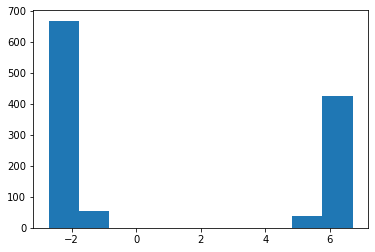

In [573]:
x,counts=sample_bins(bins)
plt.hist(np.sign(x)*np.log(np.abs(x)));


In [574]:
from scipy.optimize import minimize
x[x>0].min(),x[x<0].max(),np.mean(x),np.median(x)

(0.06596377351398876,
 -0.0012116160092501185,
 0.07483755316843327,
 0.08785236718037961)

In [575]:
def fun(y):
    return log_abs_error(x,y)
def score_plan(x):
    names=['mean','median','zero','1e-9','-1e-9','min','max']
    a=[fun(x.mean()),fun(np.median(x)),fun(0),      ]
    
    #points = np.percentile(x, list(range(0,100,10)))
    #b=[fun(u) for u in points]
    points=[1e-9,-1e-9]
    p1= np.min(x[x>0])
    points.append(p1)
    u=x[x<0]
    if len(u)>0:
        p2=np.max(u)
        points.append(p2)
    b=[fun(u) for u in points]
    a=a+b
    i = np.argmin(a)
    return a[i],names[i], pd.DataFrame(zip(names,a)).sort_values(1)

In [576]:
def g1(x):
    points = np.percentile(x, list(range(0,100,10)))
    bestres=None
    for p in points:
        res = minimize(fun, p, method='Nelder-Mead', tol=1e-6)
        if bestres is None or bestres.fun>res.fun:
            bestres=res
    return bestres
def g2(x):
    points = np.percentile(x, list(range(0,100,10)))
    bestres=None
    for p in points:
        res = minimize(fun, p, method='powell', tol=1e-6)
        if bestres is None or bestres.fun>res.fun:
            bestres=res
    return bestres

In [577]:
a,b,c=score_plan(x)
c

0         1
6     max -4.082832
4   -1e-9 -3.683253
2    zero -3.683253
3    1e-9 -3.683253
1  median -3.139331
0    mean -3.073361
5     min -2.975183

In [578]:
res = minimize(fun, np.mean(x), method='Nelder-Mead', tol=1e-6)
res.fun,res.x[0]

(-3.2239946893026485, 0.11596805643291586)

In [579]:
res = g1(x)
res.fun,res.x[0]

(-4.393554152752478, -0.002306611122748922)

In [580]:
res = minimize(fun, np.median(x), method='powell', tol=1e-6)
res.fun,res.x

(-4.390910077469799, array(-0.00220786))

In [581]:
res = g2(x)
res.fun,res.x

(-4.393554700624901, array(-0.00230661))